In [9]:
# !pip install -U sentence-transformers

In [10]:
# !apt-get install mecab mecab-ipadic-utf8 python-mecab libmecab-dev
# !pip install mecab-python3 

In [11]:
# !pip install ginza

In [4]:
import transformers
transformers.BertTokenizer = transformers.BertJapaneseTokenizer

In [ ]:
# !git clone https://github.com/STAIR-Lab-CIT/STAIR-captions
# !tar zxvf STAIR-captions/stair_captions_v1.2.tar.gz
# !ls -lh *.json

# データ作成

In [ ]:
# import json
# with open("stair_captions_v1.2_val.json", "r") as f:
#   json_data_val = json.load(f)
# with open("stair_captions_v1.2_train.json", "r") as f:
#   json_data_train = json.load(f)

In [ ]:
# dataset = {}
# ids = []
# captions = []

# def build_dataset(dataset, json_data):
#   num_samples = len(json_data['annotations'])
#   for i in range(num_samples):
#     anno = json_data['annotations'][i]
#     image_id = anno["image_id"]
#     image_captions = dataset.get(image_id, [])
#     image_captions.append((anno["id"], anno["caption"]))
#     ids.append(anno["id"])
#     captions.append(anno["caption"])
#     dataset[image_id] = image_captions

# build_dataset(dataset, json_data_val)
# build_dataset(dataset, json_data_train)

In [ ]:
# id2idx = {id:idx for idx, id in enumerate(ids)}

In [ ]:
# import numpy as np
# import spacy
# import pkg_resources, imp
# imp.reload(pkg_resources)

# nlp = spacy.load("ja_ginza")

# vectors = []
# cnt = 0
# for caption in captions:
#   cnt = cnt + 1
#   print(cnt,"/",len(captions),"  ",caption)
#   doc = nlp(caption, disable=['ner'])
#   vectors.append(doc.vector)

# del nlp

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# def similarity(id1, id2):
#   return cosine_similarity([vectors[id2idx[id1]]], [vectors[id2idx[id2]]])[0][0]

In [ ]:
# import random

# def make_triplets(dataset, threshold=0.85, seed=7, max_tries=25):
#   triplets = []
#   random.seed(seed)
#   neg_candidate_indices = list(range(len(ids)))
#   random.shuffle(neg_candidate_indices)
#   def log(i, str):
#     if i % 5000 == 0:
#       print(str)

#   for i, image_id in enumerate(list(dataset.keys())): 
#     log(i, "### %d ###" % (image_id))

#     # pickup positive pair.
#     score = 0.0
#     tries = 0
#     while score < threshold : 
#       [(id, caption), (id_pos, caption_pos)] = random.sample(dataset[image_id],2)
#       score = similarity(id, id_pos)
#       tries+=1
#       if tries > max_tries:
#         break
#     if score < threshold:
#       continue

#     # pickup negative one.
#     id_neg = id
#     current_caption_ids = [id_cap[0] for id_cap in dataset[image_id]]
#     while id_neg in current_caption_ids:
#       idx_neg = neg_candidate_indices.pop()
#       id_neg = ids[idx_neg]
#     caption_neg = captions[id2idx[id_neg]]

#     log(i, "  pos:  score: %4.2f [%s]:[%s]" % (score, caption, caption_pos))
#     log(i, "  neg:  score: %4.2f [%s]:[%s]" % (similarity(id, id_neg), caption, caption_neg))
#     triplets.append({
#       "image_id": image_id,
#       "id": id,
#       "id_pos": id_pos,
#       "id_neg": id_neg,
#       "caption": caption,
#       "caption_pos": caption_pos,
#       "caption_neg": caption_neg  
#     })
#   return triplets

In [ ]:
# triplets = make_triplets(dataset)

# ### 580856 ###
#   pos:  score: 0.85 [夜の街にオープンしているワイナリーの入り口]:[踏切の近くにワイナリーが開店している]
#   neg:  score: 0.47 [夜の街にオープンしているワイナリーの入り口]:[野球選手のフォームの確認をしている]
# ### 235486 ###
#   pos:  score: 0.90 [2人の女性と1人の男性が食卓を囲んでいる]:[三人の男女がピザと飲み物を囲んで笑っている]
#   neg:  score: 0.60 [2人の女性と1人の男性が食卓を囲んでいる]:[赤い飛行機が飛行機雲をひいて飛んでいる]
# ### 133631 ###
#   pos:  score: 0.90 [1頭のゾウが柵の内側に立っている]:[土の上に立っているゾウには牙がある]
#   neg:  score: 0.84 [1頭のゾウが柵の内側に立っている]:[洗面所に花瓶に入った花が飾られている]
# ### 467843 ###
# ### 423588 ###
#   pos:  score: 0.85 [雪山の小さな小屋の屋根に、スノーボードを履いた人物が乗り、それを3人の人物が見ている]:[スキー場で数人の人がスノボーをしている]
#   neg:  score: 0.71 [雪山の小さな小屋の屋根に、スノーボードを履いた人物が乗り、それを3人の人物が見ている]:[ぞうがトラックで運ばれている]
# ### 115765 ###
#   pos:  score: 0.89 [ギターバックを持っている男性が、傘を持った2人の女性に紙を渡して話しかけている]:[傘をさした女性と、楽器をもった人]
#   neg:  score: 0.83 [ギターバックを持っている男性が、傘を持った2人の女性に紙を渡して話しかけている]:[赤いユニフォームを着た人はバッドを振っている]
...

## ＃ここはNTICRでもつかえそう

In [ ]:
# len(triplets)

# # 120582

# from sklearn.model_selection import train_test_split
# train, dev_test = train_test_split(triplets, train_size=0.8, random_state=4)
# dev, test = train_test_split(dev_test, train_size=0.5, random_state=7)

In [ ]:
# %cd drive
# %cd "My Drive"
# %cd "Colab Notebooks"
# %cd "sentenceBERT"

/content/drive
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/sentenceBERT


In [ ]:
# def to_tsv(fname, triplet):
#   with open(fname, "w") as f:
#     lines = ["%s\t%s\t%s" % (example["caption"], example["caption_pos"], example["caption_neg"]) for example in triplet]
#     f.write("\n".join(lines)+"\n")

# to_tsv("triplet_train.tsv", train)
# to_tsv("triplet_dev.tsv", dev)
# to_tsv("triplet_test.tsv", test)

# 学習開始

In [25]:
import pandas as pd
train = pd.read_table("triplet_train.tsv",header=None)

In [13]:
BATCH_SIZE = 16
NUM_EPOCHS = 1
EVAL_STEPS = 1000
WARMUP_STEPS = int(len(train) // BATCH_SIZE * 0.1) 
OUTPUT_PATH = "sbert_stair"

In [14]:
# !sudo apt install mecab
# !sudo apt install libmecab-dev
# !sudo apt install mecab-ipadic-utf8
# !pip install seqeval
# !pip install transformers
# !pip install Mecab
# !pip install unidic-lite
# !pip install fugashi
# !pip install ipadic
# !pip install conllu

In [15]:
import transformers
transformers.BertTokenizer = transformers.BertJapaneseTokenizer

from sentence_transformers import SentenceTransformer
from sentence_transformers import models
from sentence_transformers.losses import TripletDistanceMetric, TripletLoss
from sentence_transformers.evaluation import TripletEvaluator
from sentence_transformers.readers import TripletReader
from sentence_transformers.datasets import SentencesDataset
from torch.utils.data import DataLoader

transformer = models.BERT('cl-tohoku/bert-base-japanese-whole-word-masking')

pooling = models.Pooling(
    transformer.get_word_embedding_dimension(), 
    pooling_mode_mean_tokens=True, 
    pooling_mode_cls_token=False, 
    pooling_mode_max_tokens=False
)

model = SentenceTransformer(modules=[transformer, pooling])

In [16]:
triplet_reader = TripletReader(".")
train_data = SentencesDataset(triplet_reader.get_examples('triplet_train.tsv'), model=model)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)

In [17]:
train_loss = TripletLoss(model=model, distance_metric=TripletDistanceMetric.EUCLIDEAN, triplet_margin=1)

In [18]:
import pandas as pd
data = pd.read_table("triplet_dev.tsv",header=None)

In [19]:
data[0]

0                     白い電子レンジの横からパンが出ている
1                小さなトラックでけん引した荷台に馬が乗っている
2            スーツを着た男性とドレスを着た女性がケーキのそばにいる
3                   雪の上をスキー板を持った男性が歩いている
4                 下着姿の女性がベッドにうつぶせに寝転んでいる
                      ...               
12277           黄色いサーフボードを持った人が海の中に入っている
12278               夜、白い建物の上部にある時計が光っている
12279    枯れ木の前に黒いハットを被った金髪の女性が馬に乗って歩いている
12280                 部屋の窓際に大きな織り機が置いてある
12281           酒樽の上にメニューとおつまみとワインが置いている
Name: 0, Length: 12282, dtype: object

In [20]:
# dev_data = SentencesDataset(triplet_reader.get_examples('triplet_dev.tsv'), model=model)
# dev_dataloader = DataLoader(dev_data, shuffle=False, batch_size=BATCH_SIZE)
# evaluator = TripletEvaluator(dev_dataloader)

evaluator = TripletEvaluator(data[0],data[1],data[2])

In [21]:
model.fit(train_objectives=[(train_dataloader, train_loss)],
         evaluator=evaluator,
         epochs=NUM_EPOCHS,
         evaluation_steps=EVAL_STEPS,
         warmup_steps=WARMUP_STEPS,
         output_path=OUTPUT_PATH
         )

In [22]:
!find ./sbert_stair -print

./sbert_stair
./sbert_stair/modules.json
./sbert_stair/0_BERT
./sbert_stair/0_BERT/config.json
./sbert_stair/0_BERT/tokenizer_config.json
./sbert_stair/0_BERT/pytorch_model.bin
./sbert_stair/0_BERT/special_tokens_map.json
./sbert_stair/0_BERT/sentence_bert_config.json
./sbert_stair/0_BERT/vocab.txt
./sbert_stair/1_Pooling
./sbert_stair/1_Pooling/config.json
./sbert_stair/triplet_evaluation_results.csv
./sbert_stair/config.json


In [23]:
!cat sbert_stair/triplet_evaluation_results.csv

epoch,steps,accuracy_cosinus,accuracy_manhatten,accuracy_euclidean
0,1000,0.9839602670574825,0.9840416870216577,0.9840416870216577
0,2000,0.9888454649079954,0.9891711447646963,0.9894968246213972
0,3000,0.9903110242631493,0.9910438039407262,0.9910438039407262
0,4000,0.9907995440482006,0.9911252239049014,0.9911252239049014
0,5000,0.9908809640123758,0.9914509037616024,0.9916137436899528
0,6000,0.991695163654128,0.9920208435108289,0.9921022634750041
0,-1,0.991695163654128,0.9921022634750041,0.9921022634750041


In [ ]:
import pandas as pd
eval_df = pd.read_csv("sbert_stair/triplet_evaluation_results.csv")
eval_df["steps"][6] = len(train) // BATCH_SIZE
eval_df.plot(x="steps", y=["accuracy_cosinus", "accuracy_manhatten",    "accuracy_euclidean"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='steps'>

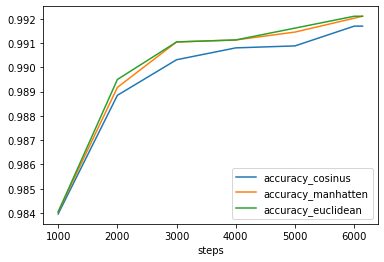

In [26]:
import pandas as pd
eval_df = pd.read_csv("sbert_stair/triplet_evaluation_results.csv")
eval_df["steps"][6] = len(train) // BATCH_SIZE
eval_df.plot(x="steps", y=["accuracy_cosinus", "accuracy_manhatten",    "accuracy_euclidean"])

## ここからは検証用オリジナルコード

In [127]:
sbert = SentenceTransformer('./sbert_stair')

In [138]:
text_1= "私はバナナが好かないです"
text_2= "私はバナナは嫌いです"
text_3= "吾輩は猫である名前はまだない"

In [145]:
# text_1= "私はバナナが好きです"
# text_2= "私はバナナは嫌いです"
# text_3= "芭蕉の実が好物だ"

In [146]:
kekka_1 = sbert.encode(text_1)
kekka_2 = sbert.encode(text_2)
kekka_3 = sbert.encode(text_3)

In [147]:
from sklearn.metrics.pairwise import cosine_similarity
cos_12 = cosine_similarity([kekka_1],[kekka_2])
cos_23 = cosine_similarity([kekka_2],[kekka_3])
cos_13 = cosine_similarity([kekka_1],[kekka_3])

In [148]:
print(cos_12)
print(cos_23)
print(cos_13)

[[0.9830932]]
[[0.7314427]]
[[0.741143]]


# 2022/4 追記

In [9]:
import pickle

with open("Budda_dict.binaryfile",'rb') as f:
    data = pickle.load(f)

{'蛇の毒が〔身体のすみずみに〕広がるのを薬で制するように怒りが起るのを制する出家修行者は迷いの世界を捨てさる': array([-4.30155471e-02, -1.74017817e-01,  4.71509881e-02,  1.57278374e-01,
         1.04545288e-01,  8.27225968e-02, -7.46483386e-01, -2.26737306e-01,
        -2.75973946e-01,  6.39105588e-02, -1.17122245e+00, -2.53925532e-01,
         1.80514619e-01, -2.76596844e-01, -4.57176030e-01,  4.97771055e-01,
        -4.23669815e-01, -1.16820030e-01,  1.36648655e-01,  4.85276878e-02,
        -9.45288837e-02, -7.81875908e-01, -3.27433705e-01,  3.20440382e-01,
         3.18157852e-01,  2.12484822e-01,  6.55883670e-01, -7.44759917e-01,
        -7.02223778e-01, -4.81686562e-01, -5.09887815e-01,  2.39366859e-01,
         1.23348713e-01,  4.24554087e-02, -1.98320225e-01,  2.57678688e-01,
         1.93140954e-01,  5.97540259e-01,  7.94854760e-02,  2.01426253e-01,
        -5.01902044e-01, -7.63032734e-01,  4.13531780e-01,  1.12967819e-01,
         8.62702787e-01,  4.09871370e-01,  4.68478739e-01, -3.96842867e-01,
         1.51570573e-01,  4.451